In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json
from tabulate import tabulate
import pandas as pd

In [2]:
files_vals = [
    ["2.14","10","1"],
    ["2.14","10","2"],
    ["2.14","15","1"],
    ["2.14","15","2"],
    ["2.14","20","1"],
    ["2.14","20","2"],
    ["4.5","10","1"],
    ["4.5","10","2"],
    ["4.5","20","1"],
    ["4.5","20","2"],
    ["4.5","30","1"],
    ["4.5","30","2"]
]

In [3]:
params_1x = [json.load(open("processed_params/bead_diam="+X[0]+"-laser_power="+X[1]+"-trial="+X[2]+"-direction=x-trap=1.txt")) for X in files_vals]
params_1y = [json.load(open("processed_params/bead_diam="+X[0]+"-laser_power="+X[1]+"-trial="+X[2]+"-direction=y-trap=1.txt")) for X in files_vals]
params_2x = [json.load(open("processed_params/bead_diam="+X[0]+"-laser_power="+X[1]+"-trial="+X[2]+"-direction=x-trap=2.txt")) for X in files_vals]
params_2y = [json.load(open("processed_params/bead_diam="+X[0]+"-laser_power="+X[1]+"-trial="+X[2]+"-direction=y-trap=2.txt")) for X in files_vals]

In [4]:
df = pd.DataFrame(params_1x + params_1y + params_2x + params_2y);
df

,laser power,trial number,direction,trap,Bead diameter (um),Viscosity (Pa*s),Temperature,Rf (pN/V),fc (Hz),err_fc (Hz),...,err_D (V^2/s),beta (um/V),beta err (um/V),kappa (pN/nm),kappa err (pN/nm),stationary std (m),equipartition std (m),std rel err,autocorr kappa (pN/nm),autocorr beta (um/V)
0,10,1,x,1,2.14,0.00089,25,290.870508,2215.334405,15.318681,...,0.001458,1.164141,0.005016,0.249858,0.001728,3.739187e-09,4.059450e-09,0.078893,0.256614,1.155025
1,10,2,x,1,2.14,0.00089,25,285.107866,2146.431393,14.848912,...,0.001436,1.177707,0.005113,0.242087,0.001675,3.799424e-09,4.124092e-09,0.078725,0.236124,1.229099
2,15,1,x,1,2.14,0.00089,25,293.895360,3612.579226,33.002760,...,0.006310,0.721308,0.005164,0.407448,0.003722,2.786469e-09,3.178910e-09,0.123451,0.390655,0.774117
3,15,2,x,1,2.14,0.00089,25,296.267529,3688.149576,37.927881,...,0.007469,0.712231,0.005884,0.415971,0.004278,2.738507e-09,3.146173e-09,0.129575,0.554025,0.480221
4,20,1,x,1,2.14,0.00089,25,300.872497,5526.001941,104.767190,...,0.033801,0.482744,0.008292,0.623255,0.011816,2.106755e-09,2.570285e-09,0.180342,NaN,NaN
5,20,2,x,1,2.14,0.00089,25,299.765687,5803.794607,160.250640,...,0.056536,0.457947,0.011840,0.654586,0.018074,2.002203e-09,2.508019e-09,0.201680,NaN,NaN
6,10,1,x,1,4.50,0.00089,25,219.730152,256.370893,5.733486,...,0.000066,3.613828,0.014239,0.060803,0.001360,8.467160e-09,8.229115e-09,0.028927,0.052737,3.771278
7,10,2,x,1,4.50,0.00089,25,234.203560,275.698041,3.336301,...,0.000041,3.581841,0.008734,0.065386,0.000791,7.490000e-09,7.935433e-09,0.056132,0.070668,3.634510
8,20,1,x,1,4.50,0.00089,25,200.379916,502.012262,4.133545,...,0.000235,1.683009,0.005129,0.119061,0.000980,6.602391e-09,5.880718e-09,0.122719,0.072632,1.921831
9,20,2,x,1,4.50,0.00089,25,266.325688,661.140772,5.109587,...,0.000209,1.698500,0.004697,0.156801,0.001212,4.897914e-09,5.124370e-09,0.044192,0.160745,1.718069


In [5]:
df["stationary std (nm)"] = df["stationary std (m)"].apply(lambda x: 1e9*x)
df["equipartition std (nm)"] = df["equipartition std (m)"].apply(lambda x: 1e9*x)

In [6]:
df.to_csv("all_results.csv")

In [7]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "CMU Serif"
})


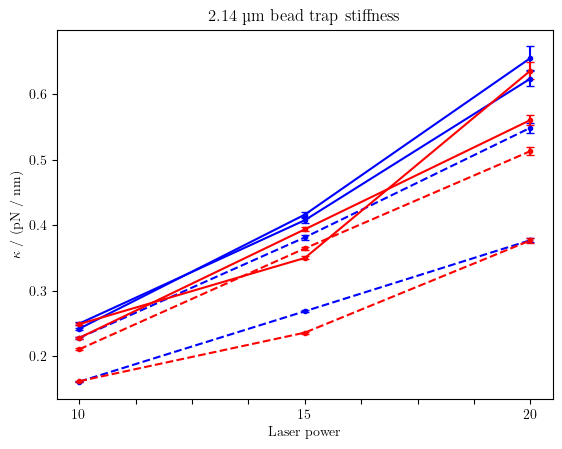

solid = trap 1, dashed = trap 2, blue = x-direction, red = y-direction


In [8]:
ax= df[(df["Bead diameter (um)"] == 2.14) & (df["direction"] == "x") & (df["trap"] == "1") & (df["trial number"] == "1")].plot(x="laser power",y="kappa (pN/nm)",color="blue",kind="line",marker=".",legend=False,yerr="kappa err (pN/nm)",capsize=3)
df[(df["Bead diameter (um)"] == 2.14) & (df["direction"] == "x") & (df["trap"] == "1") & (df["trial number"] == "2")].plot(ax=ax,x="laser power",y="kappa (pN/nm)",color="blue",kind="line",marker=".",legend=False,yerr="kappa err (pN/nm)",capsize=3)
df[(df["Bead diameter (um)"] == 2.14) & (df["direction"] == "x") & (df["trap"] == "2") & (df["trial number"] == "1")].plot(ax=ax,x="laser power",y="kappa (pN/nm)",color="blue",linestyle="--",kind="line",marker=".",legend=False,yerr="kappa err (pN/nm)",capsize=3)
df[(df["Bead diameter (um)"] == 2.14) & (df["direction"] == "x") & (df["trap"] == "2") & (df["trial number"] == "2")].plot(ax=ax,x="laser power",y="kappa (pN/nm)",color="blue",linestyle="--",kind="line",marker=".",legend=False,yerr="kappa err (pN/nm)",capsize=3)
df[(df["Bead diameter (um)"] == 2.14) & (df["direction"] == "y") & (df["trap"] == "1") & (df["trial number"] == "1")].plot(ax=ax,x="laser power",y="kappa (pN/nm)",color="red",kind="line",marker=".",legend=False,yerr="kappa err (pN/nm)",capsize=3)
df[(df["Bead diameter (um)"] == 2.14) & (df["direction"] == "y") & (df["trap"] == "1") & (df["trial number"] == "2")].plot(ax=ax,x="laser power",y="kappa (pN/nm)",color="red",kind="line",marker=".",legend=False,yerr="kappa err (pN/nm)",capsize=3)
df[(df["Bead diameter (um)"] == 2.14) & (df["direction"] == "y") & (df["trap"] == "2") & (df["trial number"] == "1")].plot(ax=ax,x="laser power",y="kappa (pN/nm)",color="red",linestyle="--",kind="line",marker=".",legend=False,yerr="kappa err (pN/nm)",capsize=3)
df[(df["Bead diameter (um)"] == 2.14) & (df["direction"] == "y") & (df["trap"] == "2") & (df["trial number"] == "2")].plot(ax=ax,x="laser power",y="kappa (pN/nm)",color="red",linestyle="--",kind="line",marker=".",legend=False,yerr="kappa err (pN/nm)",capsize=3)
plt.title("2.14 µm bead trap stiffness");
plt.xlabel("Laser power");
plt.ylabel("$\kappa$ / (pN / nm)");
plt.savefig("2-14umbead-stiffness.png",dpi=300)
plt.show()
print("solid = trap 1, dashed = trap 2, blue = x-direction, red = y-direction")

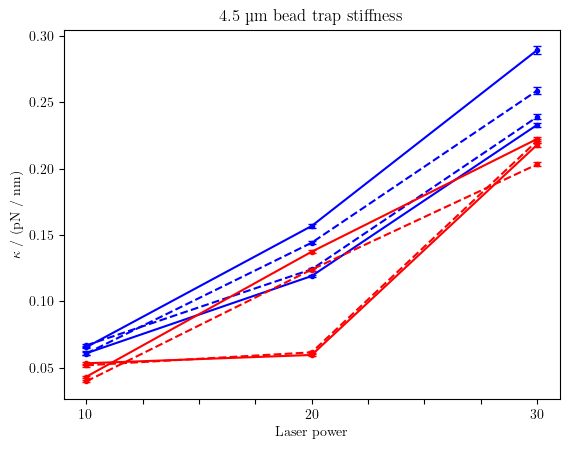

solid = trap 1, dashed = trap 2, blue = x-direction, red = y-direction


In [9]:
ax= df[(df["Bead diameter (um)"] == 4.50) & (df["direction"] == "x") & (df["trap"] == "1") & (df["trial number"] == "1")].plot(x="laser power",y="kappa (pN/nm)",color="blue",kind="line",marker=".",legend=False,yerr="kappa err (pN/nm)",capsize=3)
df[(df["Bead diameter (um)"] == 4.50) & (df["direction"] == "x") & (df["trap"] == "1") & (df["trial number"] == "2")].plot(ax=ax,x="laser power",y="kappa (pN/nm)",color="blue",kind="line",marker=".",legend=False,yerr="kappa err (pN/nm)",capsize=3)
df[(df["Bead diameter (um)"] == 4.50) & (df["direction"] == "x") & (df["trap"] == "2") & (df["trial number"] == "1")].plot(ax=ax,x="laser power",y="kappa (pN/nm)",color="blue",linestyle="--",kind="line",marker=".",legend=False,yerr="kappa err (pN/nm)",capsize=3)
df[(df["Bead diameter (um)"] == 4.50) & (df["direction"] == "x") & (df["trap"] == "2") & (df["trial number"] == "2")].plot(ax=ax,x="laser power",y="kappa (pN/nm)",color="blue",linestyle="--",kind="line",marker=".",legend=False,yerr="kappa err (pN/nm)",capsize=3)
df[(df["Bead diameter (um)"] == 4.50) & (df["direction"] == "y") & (df["trap"] == "1") & (df["trial number"] == "1")].plot(ax=ax,x="laser power",y="kappa (pN/nm)",color="red",kind="line",marker=".",legend=False,yerr="kappa err (pN/nm)",capsize=3)
df[(df["Bead diameter (um)"] == 4.50) & (df["direction"] == "y") & (df["trap"] == "1") & (df["trial number"] == "2")].plot(ax=ax,x="laser power",y="kappa (pN/nm)",color="red",kind="line",marker=".",legend=False,yerr="kappa err (pN/nm)",capsize=3)
df[(df["Bead diameter (um)"] == 4.50) & (df["direction"] == "y") & (df["trap"] == "2") & (df["trial number"] == "1")].plot(ax=ax,x="laser power",y="kappa (pN/nm)",color="red",linestyle="--",kind="line",marker=".",legend=False,yerr="kappa err (pN/nm)",capsize=3)
df[(df["Bead diameter (um)"] == 4.50) & (df["direction"] == "y") & (df["trap"] == "2") & (df["trial number"] == "2")].plot(ax=ax,x="laser power",y="kappa (pN/nm)",color="red",linestyle="--",kind="line",marker=".",legend=False,yerr="kappa err (pN/nm)",capsize=3)
plt.title("4.5 µm bead trap stiffness");
plt.xlabel("Laser power");
plt.ylabel("$\kappa$ / (pN / nm)");
plt.savefig("4-5umbead-stiffness.png",dpi=300)
plt.show()
print("solid = trap 1, dashed = trap 2, blue = x-direction, red = y-direction")

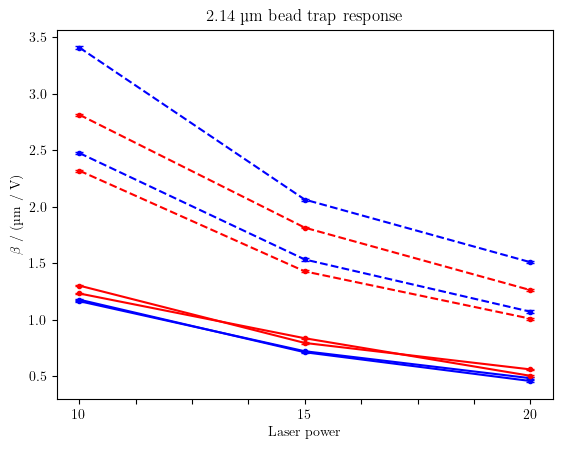

solid = trap 1, dashed = trap 2, blue = x-direction, red = y-direction


In [10]:
ax= df[(df["Bead diameter (um)"] == 2.14) & (df["direction"] == "x") & (df["trap"] == "1") & (df["trial number"] == "1")].plot(x="laser power",y="beta (um/V)",color="blue",kind="line",marker=".",legend=False,yerr="beta err (um/V)",capsize=3)
df[(df["Bead diameter (um)"] == 2.14) & (df["direction"] == "x") & (df["trap"] == "1") & (df["trial number"] == "2")].plot(ax=ax,x="laser power",y="beta (um/V)",color="blue",kind="line",marker=".",legend=False,yerr="beta err (um/V)",capsize=3)
df[(df["Bead diameter (um)"] == 2.14) & (df["direction"] == "x") & (df["trap"] == "2") & (df["trial number"] == "1")].plot(ax=ax,x="laser power",y="beta (um/V)",color="blue",linestyle="--",kind="line",marker=".",legend=False,yerr="beta err (um/V)",capsize=3)
df[(df["Bead diameter (um)"] == 2.14) & (df["direction"] == "x") & (df["trap"] == "2") & (df["trial number"] == "2")].plot(ax=ax,x="laser power",y="beta (um/V)",color="blue",linestyle="--",kind="line",marker=".",legend=False,yerr="beta err (um/V)",capsize=3)
df[(df["Bead diameter (um)"] == 2.14) & (df["direction"] == "y") & (df["trap"] == "1") & (df["trial number"] == "1")].plot(ax=ax,x="laser power",y="beta (um/V)",color="red",kind="line",marker=".",legend=False,yerr="beta err (um/V)",capsize=3)
df[(df["Bead diameter (um)"] == 2.14) & (df["direction"] == "y") & (df["trap"] == "1") & (df["trial number"] == "2")].plot(ax=ax,x="laser power",y="beta (um/V)",color="red",kind="line",marker=".",legend=False,yerr="beta err (um/V)",capsize=3)
df[(df["Bead diameter (um)"] == 2.14) & (df["direction"] == "y") & (df["trap"] == "2") & (df["trial number"] == "1")].plot(ax=ax,x="laser power",y="beta (um/V)",color="red",linestyle="--",kind="line",marker=".",legend=False,yerr="beta err (um/V)",capsize=3)
df[(df["Bead diameter (um)"] == 2.14) & (df["direction"] == "y") & (df["trap"] == "2") & (df["trial number"] == "2")].plot(ax=ax,x="laser power",y="beta (um/V)",color="red",linestyle="--",kind="line",marker=".",legend=False,yerr="beta err (um/V)",capsize=3)
plt.title("2.14 µm bead trap response");
plt.xlabel("Laser power");
plt.ylabel("$\\beta $ / (µm / V)");
plt.savefig("2-14umbead-beta.png",dpi=300)
plt.show()
print("solid = trap 1, dashed = trap 2, blue = x-direction, red = y-direction")

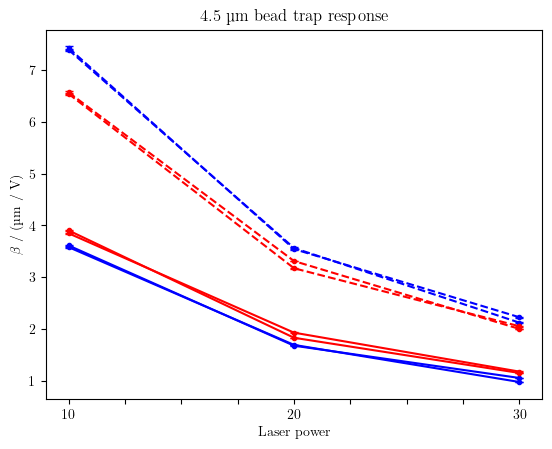

solid = trap 1, dashed = trap 2, blue = x-direction, red = y-direction


In [11]:
ax= df[(df["Bead diameter (um)"] == 4.5) & (df["direction"] == "x") & (df["trap"] == "1") & (df["trial number"] == "1")].plot(x="laser power",y="beta (um/V)",color="blue",kind="line",marker=".",legend=False,yerr="beta err (um/V)",capsize=3)
df[(df["Bead diameter (um)"] == 4.5) & (df["direction"] == "x") & (df["trap"] == "1") & (df["trial number"] == "2")].plot(ax=ax,x="laser power",y="beta (um/V)",color="blue",kind="line",marker=".",legend=False,yerr="beta err (um/V)",capsize=3)
df[(df["Bead diameter (um)"] == 4.5) & (df["direction"] == "x") & (df["trap"] == "2") & (df["trial number"] == "1")].plot(ax=ax,x="laser power",y="beta (um/V)",color="blue",linestyle="--",kind="line",marker=".",legend=False,yerr="beta err (um/V)",capsize=3)
df[(df["Bead diameter (um)"] == 4.5) & (df["direction"] == "x") & (df["trap"] == "2") & (df["trial number"] == "2")].plot(ax=ax,x="laser power",y="beta (um/V)",color="blue",linestyle="--",kind="line",marker=".",legend=False,yerr="beta err (um/V)",capsize=3)
df[(df["Bead diameter (um)"] == 4.5) & (df["direction"] == "y") & (df["trap"] == "1") & (df["trial number"] == "1")].plot(ax=ax,x="laser power",y="beta (um/V)",color="red",kind="line",marker=".",legend=False,yerr="beta err (um/V)",capsize=3)
df[(df["Bead diameter (um)"] == 4.5) & (df["direction"] == "y") & (df["trap"] == "1") & (df["trial number"] == "2")].plot(ax=ax,x="laser power",y="beta (um/V)",color="red",kind="line",marker=".",legend=False,yerr="beta err (um/V)",capsize=3)
df[(df["Bead diameter (um)"] == 4.5) & (df["direction"] == "y") & (df["trap"] == "2") & (df["trial number"] == "1")].plot(ax=ax,x="laser power",y="beta (um/V)",color="red",linestyle="--",kind="line",marker=".",legend=False,yerr="beta err (um/V)",capsize=3)
df[(df["Bead diameter (um)"] == 4.5) & (df["direction"] == "y") & (df["trap"] == "2") & (df["trial number"] == "2")].plot(ax=ax,x="laser power",y="beta (um/V)",color="red",linestyle="--",kind="line",marker=".",legend=False,yerr="beta err (um/V)",capsize=3)
plt.title("4.5 µm bead trap response");
plt.xlabel("Laser power");
plt.ylabel("$\\beta $ / (µm / V)");
plt.savefig("4-5umbead-beta.png",dpi=300)
plt.show()
print("solid = trap 1, dashed = trap 2, blue = x-direction, red = y-direction")

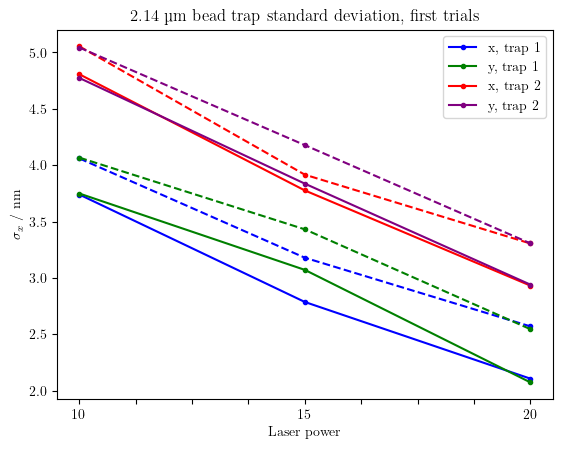

solid = measured standard dev., dash = equipartition prediction


In [12]:
ax= df[(df["Bead diameter (um)"] == 2.14) & (df["direction"] == "x") & (df["trap"] == "1") & (df["trial number"] == "1")].plot(x="laser power",y="stationary std (nm)",color="blue",kind="line",marker=".",label="x, trap 1")
df[(df["Bead diameter (um)"] == 2.14) & (df["direction"] == "x") & (df["trap"] == "1") & (df["trial number"] == "1")].plot(ax=ax,x="laser power",y="equipartition std (nm)",color="blue",kind="line",linestyle="--",marker=".",legend=False)
df[(df["Bead diameter (um)"] == 2.14) & (df["direction"] == "y") & (df["trap"] == "1") & (df["trial number"] == "1")].plot(ax=ax,x="laser power",y="stationary std (nm)",color="green",kind="line",marker=".",label="y, trap 1")
df[(df["Bead diameter (um)"] == 2.14) & (df["direction"] == "y") & (df["trap"] == "1") & (df["trial number"] == "1")].plot(ax=ax,x="laser power",y="equipartition std (nm)",color="green",kind="line",linestyle="--",marker=".",legend=False)
df[(df["Bead diameter (um)"] == 2.14) & (df["direction"] == "x") & (df["trap"] == "2") & (df["trial number"] == "1")].plot(ax=ax,x="laser power",y="stationary std (nm)",color="red",kind="line",marker=".",label="x, trap 2")
df[(df["Bead diameter (um)"] == 2.14) & (df["direction"] == "x") & (df["trap"] == "2") & (df["trial number"] == "1")].plot(ax=ax,x="laser power",y="equipartition std (nm)",color="red",kind="line",linestyle="--",marker=".",legend=False)
df[(df["Bead diameter (um)"] == 2.14) & (df["direction"] == "y") & (df["trap"] == "2") & (df["trial number"] == "1")].plot(ax=ax,x="laser power",y="stationary std (nm)",color="purple",kind="line",marker=".",label="y, trap 2")
df[(df["Bead diameter (um)"] == 2.14) & (df["direction"] == "y") & (df["trap"] == "2") & (df["trial number"] == "1")].plot(ax=ax,x="laser power",y="equipartition std (nm)",color="purple",kind="line",linestyle="--",marker=".",legend=False)
# df[(df["Bead diameter (um)"] == 2.14) & (df["direction"] == "x") & (df["trap"] == "1") & (df["trial number"] == "2")].plot(ax=ax,x="laser power",y="kappa (pN/nm)",color="blue",kind="line",marker=".",legend=False,yerr="kappa err (pN/nm)",capsize=3)
# df[(df["Bead diameter (um)"] == 2.14) & (df["direction"] == "x") & (df["trap"] == "2") & (df["trial number"] == "1")].plot(ax=ax,x="laser power",y="kappa (pN/nm)",color="blue",linestyle="--",kind="line",marker=".",legend=False,yerr="kappa err (pN/nm)",capsize=3)
# df[(df["Bead diameter (um)"] == 2.14) & (df["direction"] == "x") & (df["trap"] == "2") & (df["trial number"] == "2")].plot(ax=ax,x="laser power",y="kappa (pN/nm)",color="blue",linestyle="--",kind="line",marker=".",legend=False,yerr="kappa err (pN/nm)",capsize=3)
# df[(df["Bead diameter (um)"] == 2.14) & (df["direction"] == "y") & (df["trap"] == "1") & (df["trial number"] == "1")].plot(ax=ax,x="laser power",y="kappa (pN/nm)",color="red",kind="line",marker=".",legend=False,yerr="kappa err (pN/nm)",capsize=3)
# df[(df["Bead diameter (um)"] == 2.14) & (df["direction"] == "y") & (df["trap"] == "1") & (df["trial number"] == "2")].plot(ax=ax,x="laser power",y="kappa (pN/nm)",color="red",kind="line",marker=".",legend=False,yerr="kappa err (pN/nm)",capsize=3)
# df[(df["Bead diameter (um)"] == 2.14) & (df["direction"] == "y") & (df["trap"] == "2") & (df["trial number"] == "1")].plot(ax=ax,x="laser power",y="kappa (pN/nm)",color="red",linestyle="--",kind="line",marker=".",legend=False,yerr="kappa err (pN/nm)",capsize=3)
# df[(df["Bead diameter (um)"] == 2.14) & (df["direction"] == "y") & (df["trap"] == "2") & (df["trial number"] == "2")].plot(ax=ax,x="laser power",y="kappa (pN/nm)",color="red",linestyle="--",kind="line",marker=".",legend=False,yerr="kappa err (pN/nm)",capsize=3)
plt.title("2.14 µm bead trap standard deviation, first trials");
plt.xlabel("Laser power");
plt.ylabel("$\sigma_x$ / nm");
plt.savefig("2-14umbead-trial1-stdevs.png",dpi=300)
plt.show()
print("solid = measured standard dev., dash = equipartition prediction")

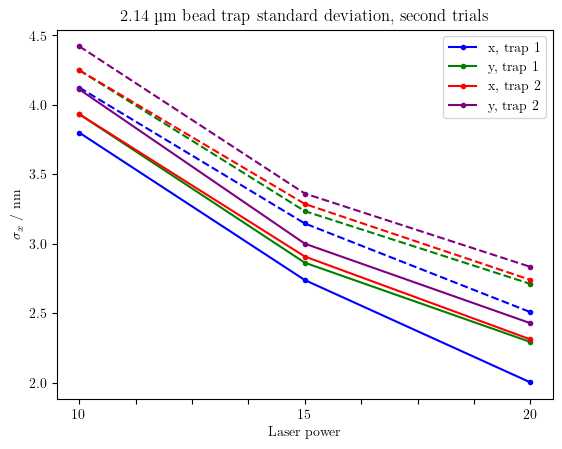

solid = measured standard dev., dash = equipartition prediction


In [13]:
ax= df[(df["Bead diameter (um)"] == 2.14) & (df["direction"] == "x") & (df["trap"] == "1") & (df["trial number"] == "2")].plot(x="laser power",y="stationary std (nm)",color="blue",kind="line",marker=".",label="x, trap 1")
df[(df["Bead diameter (um)"] == 2.14) & (df["direction"] == "x") & (df["trap"] == "1") & (df["trial number"] == "2")].plot(ax=ax,x="laser power",y="equipartition std (nm)",color="blue",kind="line",linestyle="--",marker=".",legend=False)
df[(df["Bead diameter (um)"] == 2.14) & (df["direction"] == "y") & (df["trap"] == "1") & (df["trial number"] == "2")].plot(ax=ax,x="laser power",y="stationary std (nm)",color="green",kind="line",marker=".",label="y, trap 1")
df[(df["Bead diameter (um)"] == 2.14) & (df["direction"] == "y") & (df["trap"] == "1") & (df["trial number"] == "2")].plot(ax=ax,x="laser power",y="equipartition std (nm)",color="green",kind="line",linestyle="--",marker=".",legend=False)
df[(df["Bead diameter (um)"] == 2.14) & (df["direction"] == "x") & (df["trap"] == "2") & (df["trial number"] == "2")].plot(ax=ax,x="laser power",y="stationary std (nm)",color="red",kind="line",marker=".",label="x, trap 2")
df[(df["Bead diameter (um)"] == 2.14) & (df["direction"] == "x") & (df["trap"] == "2") & (df["trial number"] == "2")].plot(ax=ax,x="laser power",y="equipartition std (nm)",color="red",kind="line",linestyle="--",marker=".",legend=False)
df[(df["Bead diameter (um)"] == 2.14) & (df["direction"] == "y") & (df["trap"] == "2") & (df["trial number"] == "2")].plot(ax=ax,x="laser power",y="stationary std (nm)",color="purple",kind="line",marker=".",label="y, trap 2")
df[(df["Bead diameter (um)"] == 2.14) & (df["direction"] == "y") & (df["trap"] == "2") & (df["trial number"] == "2")].plot(ax=ax,x="laser power",y="equipartition std (nm)",color="purple",kind="line",linestyle="--",marker=".",legend=False)
# df[(df["Bead diameter (um)"] == 2.14) & (df["direction"] == "x") & (df["trap"] == "1") & (df["trial number"] == "2")].plot(ax=ax,x="laser power",y="kappa (pN/nm)",color="blue",kind="line",marker=".",legend=False,yerr="kappa err (pN/nm)",capsize=3)
# df[(df["Bead diameter (um)"] == 2.14) & (df["direction"] == "x") & (df["trap"] == "2") & (df["trial number"] == "1")].plot(ax=ax,x="laser power",y="kappa (pN/nm)",color="blue",linestyle="--",kind="line",marker=".",legend=False,yerr="kappa err (pN/nm)",capsize=3)
# df[(df["Bead diameter (um)"] == 2.14) & (df["direction"] == "x") & (df["trap"] == "2") & (df["trial number"] == "2")].plot(ax=ax,x="laser power",y="kappa (pN/nm)",color="blue",linestyle="--",kind="line",marker=".",legend=False,yerr="kappa err (pN/nm)",capsize=3)
# df[(df["Bead diameter (um)"] == 2.14) & (df["direction"] == "y") & (df["trap"] == "1") & (df["trial number"] == "1")].plot(ax=ax,x="laser power",y="kappa (pN/nm)",color="red",kind="line",marker=".",legend=False,yerr="kappa err (pN/nm)",capsize=3)
# df[(df["Bead diameter (um)"] == 2.14) & (df["direction"] == "y") & (df["trap"] == "1") & (df["trial number"] == "2")].plot(ax=ax,x="laser power",y="kappa (pN/nm)",color="red",kind="line",marker=".",legend=False,yerr="kappa err (pN/nm)",capsize=3)
# df[(df["Bead diameter (um)"] == 2.14) & (df["direction"] == "y") & (df["trap"] == "2") & (df["trial number"] == "1")].plot(ax=ax,x="laser power",y="kappa (pN/nm)",color="red",linestyle="--",kind="line",marker=".",legend=False,yerr="kappa err (pN/nm)",capsize=3)
# df[(df["Bead diameter (um)"] == 2.14) & (df["direction"] == "y") & (df["trap"] == "2") & (df["trial number"] == "2")].plot(ax=ax,x="laser power",y="kappa (pN/nm)",color="red",linestyle="--",kind="line",marker=".",legend=False,yerr="kappa err (pN/nm)",capsize=3)
plt.title("2.14 µm bead trap standard deviation, second trials");
plt.xlabel("Laser power");
plt.ylabel("$\sigma_x$ / nm");
plt.savefig("2-14umbead-trial2-stdevs.png",dpi=300)
plt.show()
print("solid = measured standard dev., dash = equipartition prediction")

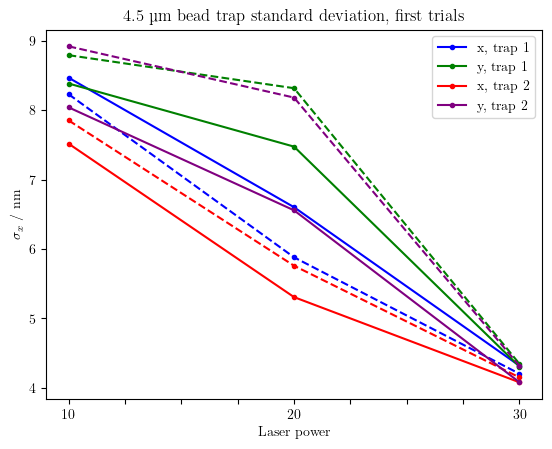

solid = measured standard dev., dash = equipartition prediction


In [14]:
ax= df[(df["Bead diameter (um)"] == 4.5) & (df["direction"] == "x") & (df["trap"] == "1") & (df["trial number"] == "1")].plot(x="laser power",y="stationary std (nm)",color="blue",kind="line",marker=".",label="x, trap 1")
df[(df["Bead diameter (um)"] == 4.5) & (df["direction"] == "x") & (df["trap"] == "1") & (df["trial number"] == "1")].plot(ax=ax,x="laser power",y="equipartition std (nm)",color="blue",kind="line",linestyle="--",marker=".",legend=False)
df[(df["Bead diameter (um)"] == 4.5) & (df["direction"] == "y") & (df["trap"] == "1") & (df["trial number"] == "1")].plot(ax=ax,x="laser power",y="stationary std (nm)",color="green",kind="line",marker=".",label="y, trap 1")
df[(df["Bead diameter (um)"] == 4.5) & (df["direction"] == "y") & (df["trap"] == "1") & (df["trial number"] == "1")].plot(ax=ax,x="laser power",y="equipartition std (nm)",color="green",kind="line",linestyle="--",marker=".",legend=False)
df[(df["Bead diameter (um)"] == 4.5) & (df["direction"] == "x") & (df["trap"] == "2") & (df["trial number"] == "1")].plot(ax=ax,x="laser power",y="stationary std (nm)",color="red",kind="line",marker=".",label="x, trap 2")
df[(df["Bead diameter (um)"] == 4.5) & (df["direction"] == "x") & (df["trap"] == "2") & (df["trial number"] == "1")].plot(ax=ax,x="laser power",y="equipartition std (nm)",color="red",kind="line",linestyle="--",marker=".",legend=False)
df[(df["Bead diameter (um)"] == 4.5) & (df["direction"] == "y") & (df["trap"] == "2") & (df["trial number"] == "1")].plot(ax=ax,x="laser power",y="stationary std (nm)",color="purple",kind="line",marker=".",label="y, trap 2")
df[(df["Bead diameter (um)"] == 4.5) & (df["direction"] == "y") & (df["trap"] == "2") & (df["trial number"] == "1")].plot(ax=ax,x="laser power",y="equipartition std (nm)",color="purple",kind="line",linestyle="--",marker=".",legend=False)
# df[(df["Bead diameter (um)"] == 2.14) & (df["direction"] == "x") & (df["trap"] == "1") & (df["trial number"] == "2")].plot(ax=ax,x="laser power",y="kappa (pN/nm)",color="blue",kind="line",marker=".",legend=False,yerr="kappa err (pN/nm)",capsize=3)
# df[(df["Bead diameter (um)"] == 2.14) & (df["direction"] == "x") & (df["trap"] == "2") & (df["trial number"] == "1")].plot(ax=ax,x="laser power",y="kappa (pN/nm)",color="blue",linestyle="--",kind="line",marker=".",legend=False,yerr="kappa err (pN/nm)",capsize=3)
# df[(df["Bead diameter (um)"] == 2.14) & (df["direction"] == "x") & (df["trap"] == "2") & (df["trial number"] == "2")].plot(ax=ax,x="laser power",y="kappa (pN/nm)",color="blue",linestyle="--",kind="line",marker=".",legend=False,yerr="kappa err (pN/nm)",capsize=3)
# df[(df["Bead diameter (um)"] == 2.14) & (df["direction"] == "y") & (df["trap"] == "1") & (df["trial number"] == "1")].plot(ax=ax,x="laser power",y="kappa (pN/nm)",color="red",kind="line",marker=".",legend=False,yerr="kappa err (pN/nm)",capsize=3)
# df[(df["Bead diameter (um)"] == 2.14) & (df["direction"] == "y") & (df["trap"] == "1") & (df["trial number"] == "2")].plot(ax=ax,x="laser power",y="kappa (pN/nm)",color="red",kind="line",marker=".",legend=False,yerr="kappa err (pN/nm)",capsize=3)
# df[(df["Bead diameter (um)"] == 2.14) & (df["direction"] == "y") & (df["trap"] == "2") & (df["trial number"] == "1")].plot(ax=ax,x="laser power",y="kappa (pN/nm)",color="red",linestyle="--",kind="line",marker=".",legend=False,yerr="kappa err (pN/nm)",capsize=3)
# df[(df["Bead diameter (um)"] == 2.14) & (df["direction"] == "y") & (df["trap"] == "2") & (df["trial number"] == "2")].plot(ax=ax,x="laser power",y="kappa (pN/nm)",color="red",linestyle="--",kind="line",marker=".",legend=False,yerr="kappa err (pN/nm)",capsize=3)
plt.title("4.5 µm bead trap standard deviation, first trials");
plt.xlabel("Laser power");
plt.ylabel("$\sigma_x$ / nm");
plt.savefig("4-5umbead-trial1-stdevs.png",dpi=300)
plt.show()
print("solid = measured standard dev., dash = equipartition prediction")

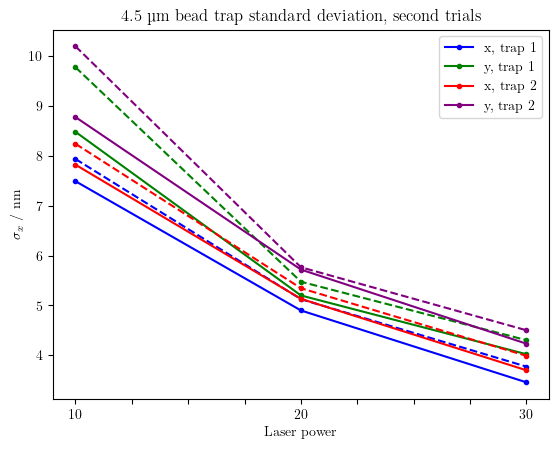

solid = measured standard dev., dash = equipartition prediction


In [15]:
ax= df[(df["Bead diameter (um)"] == 4.5) & (df["direction"] == "x") & (df["trap"] == "1") & (df["trial number"] == "2")].plot(x="laser power",y="stationary std (nm)",color="blue",kind="line",marker=".",label="x, trap 1")
df[(df["Bead diameter (um)"] == 4.5) & (df["direction"] == "x") & (df["trap"] == "1") & (df["trial number"] == "2")].plot(ax=ax,x="laser power",y="equipartition std (nm)",color="blue",kind="line",linestyle="--",marker=".",legend=False)
df[(df["Bead diameter (um)"] == 4.5) & (df["direction"] == "y") & (df["trap"] == "1") & (df["trial number"] == "2")].plot(ax=ax,x="laser power",y="stationary std (nm)",color="green",kind="line",marker=".",label="y, trap 1")
df[(df["Bead diameter (um)"] == 4.5) & (df["direction"] == "y") & (df["trap"] == "1") & (df["trial number"] == "2")].plot(ax=ax,x="laser power",y="equipartition std (nm)",color="green",kind="line",linestyle="--",marker=".",legend=False)
df[(df["Bead diameter (um)"] == 4.5) & (df["direction"] == "x") & (df["trap"] == "2") & (df["trial number"] == "2")].plot(ax=ax,x="laser power",y="stationary std (nm)",color="red",kind="line",marker=".",label="x, trap 2")
df[(df["Bead diameter (um)"] == 4.5) & (df["direction"] == "x") & (df["trap"] == "2") & (df["trial number"] == "2")].plot(ax=ax,x="laser power",y="equipartition std (nm)",color="red",kind="line",linestyle="--",marker=".",legend=False)
df[(df["Bead diameter (um)"] == 4.5) & (df["direction"] == "y") & (df["trap"] == "2") & (df["trial number"] == "2")].plot(ax=ax,x="laser power",y="stationary std (nm)",color="purple",kind="line",marker=".",label="y, trap 2")
df[(df["Bead diameter (um)"] == 4.5) & (df["direction"] == "y") & (df["trap"] == "2") & (df["trial number"] == "2")].plot(ax=ax,x="laser power",y="equipartition std (nm)",color="purple",kind="line",linestyle="--",marker=".",legend=False)
# df[(df["Bead diameter (um)"] == 2.14) & (df["direction"] == "x") & (df["trap"] == "1") & (df["trial number"] == "2")].plot(ax=ax,x="laser power",y="kappa (pN/nm)",color="blue",kind="line",marker=".",legend=False,yerr="kappa err (pN/nm)",capsize=3)
# df[(df["Bead diameter (um)"] == 2.14) & (df["direction"] == "x") & (df["trap"] == "2") & (df["trial number"] == "1")].plot(ax=ax,x="laser power",y="kappa (pN/nm)",color="blue",linestyle="--",kind="line",marker=".",legend=False,yerr="kappa err (pN/nm)",capsize=3)
# df[(df["Bead diameter (um)"] == 2.14) & (df["direction"] == "x") & (df["trap"] == "2") & (df["trial number"] == "2")].plot(ax=ax,x="laser power",y="kappa (pN/nm)",color="blue",linestyle="--",kind="line",marker=".",legend=False,yerr="kappa err (pN/nm)",capsize=3)
# df[(df["Bead diameter (um)"] == 2.14) & (df["direction"] == "y") & (df["trap"] == "1") & (df["trial number"] == "1")].plot(ax=ax,x="laser power",y="kappa (pN/nm)",color="red",kind="line",marker=".",legend=False,yerr="kappa err (pN/nm)",capsize=3)
# df[(df["Bead diameter (um)"] == 2.14) & (df["direction"] == "y") & (df["trap"] == "1") & (df["trial number"] == "2")].plot(ax=ax,x="laser power",y="kappa (pN/nm)",color="red",kind="line",marker=".",legend=False,yerr="kappa err (pN/nm)",capsize=3)
# df[(df["Bead diameter (um)"] == 2.14) & (df["direction"] == "y") & (df["trap"] == "2") & (df["trial number"] == "1")].plot(ax=ax,x="laser power",y="kappa (pN/nm)",color="red",linestyle="--",kind="line",marker=".",legend=False,yerr="kappa err (pN/nm)",capsize=3)
# df[(df["Bead diameter (um)"] == 2.14) & (df["direction"] == "y") & (df["trap"] == "2") & (df["trial number"] == "2")].plot(ax=ax,x="laser power",y="kappa (pN/nm)",color="red",linestyle="--",kind="line",marker=".",legend=False,yerr="kappa err (pN/nm)",capsize=3)
plt.title("4.5 µm bead trap standard deviation, second trials");
plt.xlabel("Laser power");
plt.ylabel("$\sigma_x$ / nm");
plt.savefig("4-5umbead-trial2-stdevs.png",dpi=300)
plt.show()
print("solid = measured standard dev., dash = equipartition prediction")